# Lorenz

In [2]:
import sympy as sp
# Lorenz
ρ,β,σ=sp.symbols(r'ρ β σ')
x = sp.Function("x")(ρ,β,σ)
y = sp.Function("y")(ρ,β,σ)
z = sp.Function("z")(ρ,β,σ)
dx = σ*(y-x)
dy = x*(ρ-z)-y
dz = x*y-β*z
lista_parametara = [ρ,β,σ]

N_P = len(lista_parametara)
lista_funkcija = [x,y,z]
lista_jednadzbi  = [dx,dy,dz]
lista_derivacija = [[p] for p in lista_parametara]+[[lista_parametara[i],lista_parametara[j]] for i in range(N_P) for j in range(i,N_P)]
from sympy.printing.latex import LatexPrinter
from sympy.core.function import UndefinedFunction

sp.init_printing()
lista = []
i = 0
for f in lista_funkcija:
    lista.append([str(f),'y[%d]'%i])
    i+=1

for a in lista_derivacija:
    for f in lista_funkcija:
        lista.append([str(sp.Derivative(f,*a,evaluate=True)),'y[%d]'%i])
        i+=1

for k in ['cos','sin']:
    lista.append([k,"np."+k])
def zamjena(string, repl):
    st = string
    for r in repl[::-1]:
        st = st.replace(*r)
    return st
i = 0
for f in lista_jednadzbi:
    print(zamjena(str(f),lista),end=',')
    i+=1
print()
for a in lista_derivacija:
    for f in lista_jednadzbi:
        print(zamjena(str(sp.Derivative(f,*a,evaluate=True)),lista),end=',')
        i+=1
    print(" #",str(a))
print()
ρ,β,σ=sp.symbols(r'\rho \beta \sigma')
x = sp.Function("x")(ρ,β,σ)
y = sp.Function("y")(ρ,β,σ)
z = sp.Function("z")(ρ,β,σ)
lista_parametara = [ρ,β,σ]
dx = σ*(y-x)
dy = x*(ρ-z)-y
dz = x*y-β*z
lista_parametara = [ρ,β,σ]

N_P = len(lista_parametara)
lista_funkcija = [x,y,z]
lista_jednadzbi  = [dx,dy,dz]
lista_derivacija = [[p] for p in lista_parametara]+[[lista_parametara[i],lista_parametara[j]] for i in range(N_P) for j in range(i,N_P)]

for a in lista_derivacija:
    for i in range(len(lista_jednadzbi)):
        f = lista_jednadzbi[i]
        lhs = r"\frac{\dif}{\dif t}" +sp.latex(sp.Derivative(lista_funkcija[i],*a,evaluate=True))
        string = lhs+"&="+sp.latex(sp.Derivative(f,*a,evaluate=True))+r"\\"
        print(zamjena(string,[[r"{\left (\rho,\beta,\sigma \right )}",""]]))

σ*(-y[0] + y[1]),(ρ - y[2])*y[0] - y[1],-β*y[2] + y[0]*y[1],
σ*(-y[3] + y[4]),(ρ - y[2])*y[3] + (-y[5] + 1)*y[0] - y[4],-β*y[5] + y[0]*y[4] + y[1]*y[3], # [ρ]
σ*(-y[6] + y[7]),(ρ - y[2])*y[6] - y[0]*y[8] - y[7],-β*y[8] + y[0]*y[7] + y[1]*y[6] - y[2], # [β]
σ*(-y[9] + y[10]) - y[0] + y[1],(ρ - y[2])*y[9] - y[0]*y[11] - y[10],-β*y[11] + y[0]*y[10] + y[1]*y[9], # [σ]
-σ*(y[12] - y[13]),(ρ - y[2])*y[12] - 2*(y[5] - 1)*y[3] - y[0]*y[14] - y[13],-β*y[14] + y[0]*y[13] + y[1]*y[12] + 2*y[3]*y[4], # [ρ, ρ]
-σ*(y[15] - y[16]),(ρ - y[2])*y[15] - (y[5] - 1)*y[6] - y[0]*y[17] - y[3]*y[8] - y[16],-β*y[17] + y[0]*y[16] + y[1]*y[15] + y[6]*y[4] + y[3]*y[7] - y[5], # [ρ, β]
-σ*(y[18] - y[19]) - y[3] + y[4],(ρ - y[2])*y[18] - (y[5] - 1)*y[9] - y[0]*y[20] - y[3]*y[11] - y[19],-β*y[20] + y[0]*y[19] + y[1]*y[18] + y[3]*y[10] + y[9]*y[4], # [ρ, σ]
-σ*(y[21] - y[22]),(ρ - y[2])*y[21] - y[0]*y[23] - 2*y[6]*y[8] - y[22],-β*y[23] + y[0]*y[22] + y[1]*y[21] + 2*y[6]*y[7] - 2*y[8], # [β, β]
-σ*(y[24] - y[25]) - y[

\frac{\dif}{\dif t}\frac{\partial^{2}}{\partial \sigma^{2}}  z&=- \beta \frac{\partial^{2}}{\partial \sigma^{2}}  z + x \frac{\partial^{2}}{\partial \sigma^{2}}  y + y \frac{\partial^{2}}{\partial \sigma^{2}}  x + 2 \frac{\partial}{\partial \sigma} x \frac{\partial}{\partial \sigma} y\\


In [12]:
%run "MBAM_codes.py"
class model(MBAM_odeint):
    def __init__(self,**odeint_kwargs):
        self.IC     = [1.,1.,10.]
        
        self.T      = np.linspace(0,2,100)
        self.xlim   = [0.001,2]
        self.ylim   = [0.001,2]
        self.θbf    = [28.,8./3.,10.]
        self._title = r'Lorenz/Lorenz'
        self.N_parameters = 3
        self.N_equations  = 3
        num = int(self.N_equations*self.N_parameters*(self.N_parameters+3)/2)
        self.INI    = np.array(self.IC+num*[0.])
        MBAM_odeint.__init__(self, self._function, self.T, 
                             self.INI,self.N_parameters, 
                             self.N_equations,**odeint_kwargs)
    def _function(self,y,t,θ):
        ρ,β,σ = θ
        return np.array([σ*(-y[0] + y[1]),(ρ - y[2])*y[0] - y[1],-β*y[2] + y[0]*y[1],
σ*(-y[3] + y[4]),(ρ - y[2])*y[3] + (-y[5] + 1)*y[0] - y[4],-β*y[5] + y[0]*y[4] + y[1]*y[3], # [ρ]
σ*(-y[6] + y[7]),(ρ - y[2])*y[6] - y[0]*y[8] - y[7],-β*y[8] + y[0]*y[7] + y[1]*y[6] - y[2], # [β]
σ*(-y[9] + y[10]) - y[0] + y[1],(ρ - y[2])*y[9] - y[0]*y[11] - y[10],-β*y[11] + y[0]*y[10] + y[1]*y[9], # [σ]
-σ*(y[12] - y[13]),(ρ - y[2])*y[12] - 2*(y[5] - 1)*y[3] - y[0]*y[14] - y[13],-β*y[14] + y[0]*y[13] + y[1]*y[12] + 2*y[3]*y[4], # [ρ, ρ]
-σ*(y[15] - y[16]),(ρ - y[2])*y[15] - (y[5] - 1)*y[6] - y[0]*y[17] - y[3]*y[8] - y[16],-β*y[17] + y[0]*y[16] + y[1]*y[15] + y[6]*y[4] + y[3]*y[7] - y[5], # [ρ, β]
-σ*(y[18] - y[19]) - y[3] + y[4],(ρ - y[2])*y[18] - (y[5] - 1)*y[9] - y[0]*y[20] - y[3]*y[11] - y[19],-β*y[20] + y[0]*y[19] + y[1]*y[18] + y[3]*y[10] + y[9]*y[4], # [ρ, σ]
-σ*(y[21] - y[22]),(ρ - y[2])*y[21] - y[0]*y[23] - 2*y[6]*y[8] - y[22],-β*y[23] + y[0]*y[22] + y[1]*y[21] + 2*y[6]*y[7] - 2*y[8], # [β, β]
-σ*(y[24] - y[25]) - y[6] + y[7],(ρ - y[2])*y[24] - y[0]*y[26] - y[6]*y[11] - y[9]*y[8] - y[25],-β*y[26] + y[0]*y[25] + y[1]*y[24] + y[6]*y[10] + y[9]*y[7] - y[11], # [β, σ]
-σ*(y[27] - y[28]) - 2*y[9] + 2*y[10],(ρ - y[2])*y[27] - y[0]*y[29] - 2*y[9]*y[11] - y[28],-β*y[29] + y[0]*y[28] + y[1]*y[27] + 2*y[9]*y[10], # [σ, σ]
                        ])
    def simulate(self):
        y, _, g, _, _, _ = self.find_solutions(self.θbf)
        V0               = self.metric_eigenvector(g)
        init = np.append(self.θbf,V0)
        ys  =y+np.random.normal(0,1,self.N_equations*self.T.size).reshape(self.T.size,self.N_equations)
        r = ys-y
        self._ys = ys
        self._y  = y
        self._rs = r
        self.init = init
        self._V0  = V0
M = model()
M.simulate()

τ=np.linspace(0,10,100)
MBAM = M.run_MBAM(M.init, τ)



/home/ktisanic/anaconda3/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


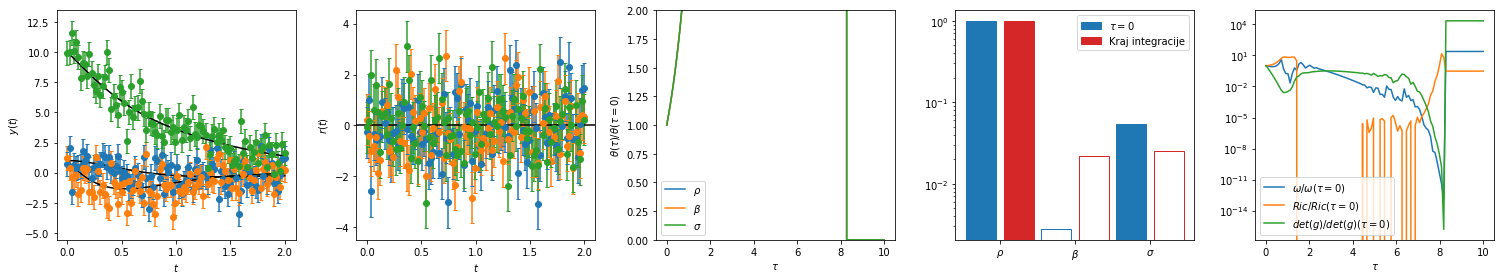

In [15]:
f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=[r'$\rho$',r'$\beta$',r'$\sigma$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u]/MBAM.θ[0,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0/MBAM.ω0[0],label=r'$\omega/\omega(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.R/MBAM.R[0],label=r'$Ric/Ric(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.detg/MBAM.detg[0],label=r'$det(g)/det(g)(\tau=0)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)/\theta(\tau=0)$')
ax[4].set_yscale('log')
ax[2].set_ylim(0,2)
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model_normalized.pdf')

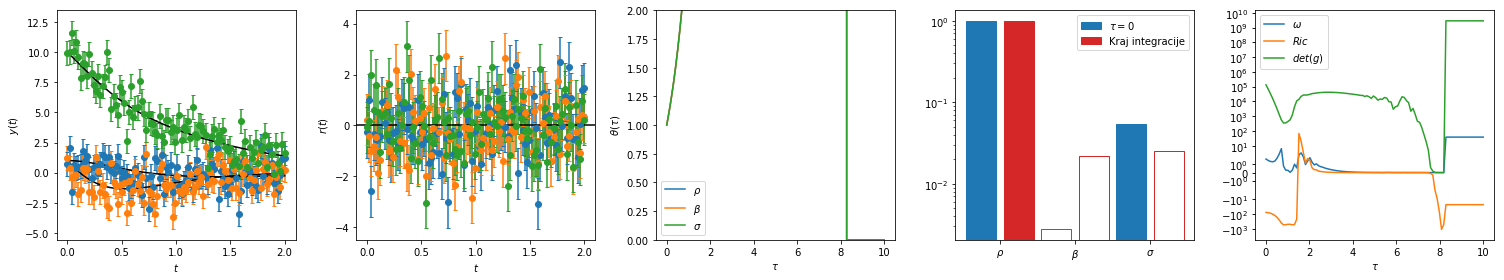

In [16]:
f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=[r'$\rho$',r'$\beta$',r'$\sigma$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0,label=r'$\omega$')
ax[4].plot(MBAM.τ,MBAM.R,label=r'$Ric$')
ax[4].plot(MBAM.τ,MBAM.detg,label=r'$det(g)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)$')

ax[4].set_yscale('symlog')
ax[2].set_ylim(0,2)
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model.pdf')